In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Training Data Loading
df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
fd = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [4]:
df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [5]:
fd.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,c2c61173092ad20db5585ca8c10de6e0,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1276.0,0,7.0,0,53447.0,1.0,...,48751.0,0,0.0,0,0,0.0,1.0,11.0,2018-08-12 13:12:00,2018-07-10
1,2e6bb5362ba1ce897feeb1de5edea686,win8defender,1.1.15100.1,4.10.209.0,1.273.371.0,0,7.0,0,46184.0,2.0,...,64709.0,1,0.0,0,0,0.0,0.0,12.0,2018-07-26 06:54:00,2016-10-11
2,692649baed1c50bb8d051ae7f06e3625,win8defender,1.1.15200.1,4.18.1807.18075,1.275.263.0,0,7.0,0,51954.0,2.0,...,33094.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-27 17:29:00,2018-05-08
3,2ff95e7d97e9f80ec81c97622dd93ed6,win8defender,1.1.15300.6,4.18.1807.18075,1.277.58.0,0,7.0,0,41571.0,2.0,...,26184.0,1,0.0,0,0,0.0,0.0,10.0,2018-09-25 22:13:00,2018-05-08
4,256766b4c5011e146f05b323863e08a4,win8defender,1.1.14800.3,4.14.17639.18041,1.267.898.0,0,7.0,0,40645.0,3.0,...,12126.0,0,0.0,0,0,0.0,0.0,7.0,2018-05-06 01:31:00,2018-06-12


In [6]:
# Check the name of the Feature and its Data type
print("Dataset Overview")
df.info()

Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm    

In [7]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           10000 non-null  object 
 1   ProductName                         10000 non-null  object 
 2   EngineVersion                       10000 non-null  object 
 3   AppVersion                          10000 non-null  object 
 4   SignatureVersion                    10000 non-null  object 
 5   IsBetaUser                          10000 non-null  int64  
 6   RealTimeProtectionState             9991 non-null   float64
 7   IsPassiveModeEnabled                10000 non-null  int64  
 8   AntivirusConfigID                   9998 non-null   float64
 9   NumAntivirusProductsInstalled       9998 non-null   float64
 10  NumAntivirusProductsEnabled         9998 non-null   float64
 11  HasTpm                              10000 

In [8]:
# Identify the features that are different data types in training and testing dataset. 
x = []
for col in fd.columns:
  if col in df.columns and fd[col].dtype != df[col].dtype:
    x.append(col)
print(x)

[]


In [9]:
# Checking the Null values in trainng datset
missing_values = df.isnull().sum()
print("Missing Values Count:-")
print(missing_values[missing_values > 0])

Missing Values Count:-
RealTimeProtectionState                66
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
CityID                                623
IsSystemProtected                      76
SMode                                 981
IEVersionID                           107
FirewallEnabled                       166
EnableLUA                              19
OEMNameID                             212
OEMModelID                            228
ProcessorCoreCount                     85
ProcessorManufacturerID                85
ProcessorModelID                       85
PrimaryDiskCapacityMB                 110
PrimaryDiskType                        23
SystemVolumeCapacityMB                110
TotalPhysicalRAMMB                    151
ChassisType                             2
PrimaryDisplayDiagonalInches           72
PrimaryDisplayResolutionHorizontal     72
PrimaryDisplayResolutionVertical       72
InternalBat

In [10]:
# Checking the Null values in test dataset
missing_values = fd.isnull().sum()
print("Missing Values Count:-")
print(missing_values[missing_values > 0])

Missing Values Count:-
RealTimeProtectionState                9
AntivirusConfigID                      2
NumAntivirusProductsInstalled          2
NumAntivirusProductsEnabled            2
CityID                                61
GeoRegionID                            1
IsSystemProtected                      2
SMode                                 92
IEVersionID                           10
FirewallEnabled                       16
OEMNameID                             18
OEMModelID                            21
ProcessorCoreCount                    11
ProcessorManufacturerID               11
ProcessorModelID                      11
PrimaryDiskCapacityMB                 10
PrimaryDiskType                        4
SystemVolumeCapacityMB                10
TotalPhysicalRAMMB                    12
PrimaryDisplayDiagonalInches           6
PrimaryDisplayResolutionHorizontal     6
PrimaryDisplayResolutionVertical       6
InternalBatteryNumberOfCharges        54
OSInstallLanguageID               

In [11]:
# Checking the unique value in each feature
for x in df.columns:
  print(f'{x} unique values {df[x].unique()}')

MachineID unique values ['f541bae429089117c4aac39c90dd3416' 'dc2b14d9ce3a0ce4050bb640190f2ca5'
 'fd20c5f010e9c5f91ad1c6b3e0da68a0' ... 'd6852dfff534e03d5ddfd3c7875ab072'
 '70a8dc682128c9ff78a3de5aea9dac74' 'ad9c385b53f2ca788933a39603b84eda']
ProductName unique values ['win8defender' 'mse']
EngineVersion unique values ['1.1.15200.1' '1.1.15100.1' '1.1.15000.2' '1.1.14800.3' '1.1.14901.4'
 '1.1.15300.6' '1.1.14700.5' '1.1.13504.0' '1.1.14104.0' '1.1.14306.0'
 '1.1.15300.5' '1.1.14600.4' '1.1.13701.0' '1.1.15000.1' '1.1.13202.0'
 '1.1.13303.0' '1.1.14500.5' '1.1.13601.0' '1.1.13704.0' '1.1.13407.0'
 '1.1.14003.0' '1.1.14202.0' '1.1.14405.2' '1.1.13000.0' '1.1.13804.0'
 '1.1.14500.2' '1.1.14800.1' '1.1.14305.0' '1.1.14901.3' '1.1.13103.0'
 '1.1.13903.0' '1.1.12805.0' '1.1.14700.4' '1.1.12902.0' '1.1.14700.3'
 '1.1.13802.0' '1.1.13803.0']
AppVersion unique values ['4.18.1807.18075' '4.12.17007.18011' '4.13.17134.228' '4.14.17639.18041'
 '4.18.1806.18062' '4.12.16299.15' '4.14.17613.18039' '

I found some 'Unknown' and 'UNKNOWN' values in some features. Now check which features have these 'Unknwon' and 'UNKNOWN' values.

In [12]:
# Check "Unknown" and "UNKNOWN" values in each column in the training dataset
unknown_counts = (df == "Unknown").sum()
Unknown_counts = (df == "UNKNOWN").sum()
unknown_counts = unknown_counts[unknown_counts > 0]
Unknown_counts = Unknown_counts[Unknown_counts > 0]
print("Number of 'Unknown' counts and respective feature name:")
print(unknown_counts)
print("Number of 'UNKNOWN' counts and respective feature name:")
print(Unknown_counts)

Number of 'Unknown' counts and respective feature name:
ChassisType      59
FlightRing     2489
dtype: int64
Number of 'UNKNOWN' counts and respective feature name:
PrimaryDiskType           3105
ChassisType                454
PowerPlatformRole          106
AutoUpdateOptionsName    26299
OSGenuineState             115
dtype: int64


In [13]:
# Check "Unknown" and "UNKNOWN" values in each column in test dataset
unknown_counts_fd = (fd == "Unknown").sum()
Unknown_counts_fd = (fd == "UNKNOWN").sum()
unknown_counts_fd = unknown_counts_fd[unknown_counts_fd > 0]
Unknown_counts_fd = Unknown_counts_fd[Unknown_counts_fd > 0]
print("Number of 'Unknown' counts and respective feature name:")
print(unknown_counts_fd)
print("Number of 'UNKNWON' counts and respective feature name:")
print(Unknown_counts_fd)

Number of 'Unknown' counts and respective feature name:
ChassisType      7
FlightRing     242
dtype: int64
Number of 'UNKNWON' counts and respective feature name:
PrimaryDiskType           324
ChassisType                39
PowerPlatformRole           9
AutoUpdateOptionsName    2649
OSGenuineState             13
dtype: int64


In [14]:
# Replace the all "Unknown" and "UNKNOWN" value with mode of feature in training dataset
df = df.replace("Unknown")
df = df.replace("UNKNOWN")

for col in ["ChassisType", "FlightRing"]:
    most_frequent = df[col].mode()[0]
    df[col] = df[col].replace("Unknown", most_frequent)
print("'Unknown' done")
for col in ['PrimaryDiskType', 'ChassisType', 'PowerPlatformRole', 'AutoUpdateOptionsName', 'OSGenuineState']:
    most_frequent = df[col].mode()[0]
    df[col] = df[col].replace("UNKNOWN", most_frequent)
print("'UNKNOWN' done")

<ipython-input-14-b8035cf1513a>:2: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df = df.replace("Unknown")
<ipython-input-14-b8035cf1513a>:3: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df = df.replace("UNKNOWN")


'Unknown' done
'UNKNOWN' done


In [15]:
# Replace the all "Unknown" and "UNKNOWN" value with mode of feature in test dataset
fd = fd.replace("Unknown")
fd = fd.replace("UNKNOWN")

for col in ["ChassisType", "FlightRing"]:
    most_frequent = fd[col].mode()[0]
    fd[col] = fd[col].replace("Unknown", most_frequent)
print("'Unknown' done")
for col in ['PrimaryDiskType', 'ChassisType', 'PowerPlatformRole', 'AutoUpdateOptionsName', 'OSGenuineState']:
    most_frequent = fd[col].mode()[0]
    fd[col] = fd[col].replace("UNKNOWN", most_frequent)
print("'UNKNOWN' done")

'Unknown' done
'UNKNOWN' done


<ipython-input-15-9fee3bc0d7f7>:2: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  fd = fd.replace("Unknown")
<ipython-input-15-9fee3bc0d7f7>:3: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  fd = fd.replace("UNKNOWN")


In [16]:
# Verify whether 'Unknown' and 'Unknown' have been removed from the training dataset.
unknown_counts = (df == "Unknown").sum()
Unknown_counts = (df == "UNKNOWN").sum()
unknown_counts = unknown_counts[unknown_counts > 0]
Unknown_counts = Unknown_counts[Unknown_counts > 0]
print("Number of 'Unknown' counts and respective feature name:")
print(unknown_counts)
print("Number of 'UNKNOWN' counts and respective feature name:")
print(Unknown_counts)

Number of 'Unknown' counts and respective feature name:
Series([], dtype: int64)
Number of 'UNKNOWN' counts and respective feature name:
Series([], dtype: int64)


In [17]:
# Verify whether 'Unknown' and 'Unknown' have been removed from the test dataset.
unknown_counts_fd = (fd == "Unknown").sum()
Unknown_counts_fd = (fd == "UNKNOWN").sum()
unknown_counts_fd = unknown_counts_fd[unknown_counts_fd > 0]
Unknown_counts_fd = Unknown_counts_fd[Unknown_counts_fd > 0]
print("Number of 'Unknown' counts and respective feature name:")
print(unknown_counts_fd)
print("Number of 'UNKNOWN' counts and respective feature name:")
print(Unknown_counts_fd)

Number of 'Unknown' counts and respective feature name:
Series([], dtype: int64)
Number of 'UNKNOWN' counts and respective feature name:
Series([], dtype: int64)


I identified features where 'nan' value is present and separated them based on mode and median imputation.

In [18]:
from sklearn.impute import SimpleImputer
# Feature that is imputed by the median.
median_features = [
    "NumAntivirusProductsInstalled", "NumAntivirusProductsEnabled", "ProcessorCoreCount",
    "PrimaryDiskCapacityMB", "SystemVolumeCapacityMB", "TotalPhysicalRAMMB",
    "PrimaryDisplayDiagonalInches", "PrimaryDisplayResolutionHorizontal",
    "PrimaryDisplayResolutionVertical", "InternalBatteryNumberOfCharges"
]
# Feature that is imputed by mode.
mode_features = [
    "RealTimeProtectionState", "AntivirusConfigID", "CityID", "IsSystemProtected",
    "SMode", "IEVersionID", "FirewallEnabled", "EnableLUA", "OEMNameID",
    "OEMModelID", "ProcessorManufacturerID", "ProcessorModelID", "PrimaryDiskType",
    "ChassisType", "OSInstallLanguageID", "IsFlightsDisabled", "FirmwareManufacturerID",
    "FirmwareVersionID", "IsVirtualDevice", "IsAlwaysOnAlwaysConnectedCapable",
    "IsGamer", "RegionIdentifier", "DateOS"
]
existing_median_features = [col for col in median_features if col in df.columns]
existing_mode_features = [col for col in mode_features if col in df.columns]

# Imputed by median
if existing_median_features:
    median_imputer = SimpleImputer(strategy="median")
    df[existing_median_features] = median_imputer.fit_transform(df[existing_median_features])

# Imputed by mode
if existing_mode_features:
    mode_imputer = SimpleImputer(strategy="most_frequent")
    df[existing_mode_features] = mode_imputer.fit_transform(df[existing_mode_features])

print("done")

done


In [19]:
from sklearn.impute import SimpleImputer
# Feature which is imputed by the median.
median_features = [
    "NumAntivirusProductsInstalled", "NumAntivirusProductsEnabled", "ProcessorCoreCount",
    "PrimaryDiskCapacityMB", "SystemVolumeCapacityMB", "TotalPhysicalRAMMB",
    "PrimaryDisplayDiagonalInches", "PrimaryDisplayResolutionHorizontal",
    "PrimaryDisplayResolutionVertical", "InternalBatteryNumberOfCharges"
]
# Feature which is imputed by mode.
mode_features = [
    "RealTimeProtectionState", "AntivirusConfigID", "CityID", "IsSystemProtected",
    "SMode", "IEVersionID", "FirewallEnabled", "EnableLUA", "OEMNameID",
    "OEMModelID", "ProcessorManufacturerID", "ProcessorModelID", "PrimaryDiskType",
    "ChassisType", "OSInstallLanguageID", "IsFlightsDisabled", "FirmwareManufacturerID",
    "FirmwareVersionID", "IsVirtualDevice", "IsAlwaysOnAlwaysConnectedCapable",
    "IsGamer", "RegionIdentifier", "DateOS", "GeoRegionID"
]

existing_median_features = [col for col in median_features if col in fd.columns]
existing_mode_features = [col for col in mode_features if col in fd.columns]

# Imputed by median
if existing_median_features:
    median_imputer = SimpleImputer(strategy="median")
    fd[existing_median_features] = median_imputer.fit_transform(fd[existing_median_features])

# Imputed by mode
if existing_mode_features:
    mode_imputer = SimpleImputer(strategy="most_frequent")
    fd[existing_mode_features] = mode_imputer.fit_transform(fd[existing_mode_features])

print("done")


done


Verify whether 'nan' has been removed from the training and test dataset.

In [20]:
print("Remaining Missing Values Count:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Remaining Missing Values Count:
Series([], dtype: int64)


In [21]:
print("Remaining Missing Values Count:")
print(fd.isnull().sum()[fd.isnull().sum() > 0])

Remaining Missing Values Count:
Series([], dtype: int64)


Now Copy the test and training dataframe into the new dataframe.

In [22]:
df_new = df.copy()
fd_new = fd.copy()

In the training dataset, some features have binary values but their data type is an 'object' hence convert them into 'int64'.

In [23]:
object_binary_list = ["RealTimeProtectionState", "IsSystemProtected", "SMode", "FirewallEnabled", "EnableLUA", "OSInstallLanguageID", "IsFlightsDisabled", "IsVirtualDevice",
                      "IsAlwaysOnAlwaysConnectedCapable", "IsGamer", "RegionIdentifier"]

for col in object_binary_list:
    df_new[col] = df_new[col].astype(int)

# Verify the changes
print(df_new[object_binary_list].dtypes)


RealTimeProtectionState             int64
IsSystemProtected                   int64
SMode                               int64
FirewallEnabled                     int64
EnableLUA                           int64
OSInstallLanguageID                 int64
IsFlightsDisabled                   int64
IsVirtualDevice                     int64
IsAlwaysOnAlwaysConnectedCapable    int64
IsGamer                             int64
RegionIdentifier                    int64
dtype: object


In the testing dataset, some features have binary values but their data type is an 'object' hence convert them into 'int64'.

In [24]:
object_list = ["RealTimeProtectionState", "IsSystemProtected", "SMode", "FirewallEnabled", "EnableLUA", "OSInstallLanguageID", "IsFlightsDisabled", "IsVirtualDevice",
                      "IsAlwaysOnAlwaysConnectedCapable", "IsGamer", "RegionIdentifier"]
for col in object_list:
    fd_new[col] = fd_new[col].astype(int)

coun = 0
# Verify the changes
print(fd_new[object_list].dtypes)
fd_new['GeoRegionID'] = fd_new['GeoRegionID'].astype(float)
c = 0
for col in fd_new.columns:
  if fd_new[col].dtype == 'object':
    c = c+1
print(c)

RealTimeProtectionState             int64
IsSystemProtected                   int64
SMode                               int64
FirewallEnabled                     int64
EnableLUA                           int64
OSInstallLanguageID                 int64
IsFlightsDisabled                   int64
IsVirtualDevice                     int64
IsAlwaysOnAlwaysConnectedCapable    int64
IsGamer                             int64
RegionIdentifier                    int64
dtype: object
37


Now verify whether each features data type same or not in both datasets.

In [25]:
cvy = []
for col in fd_new.columns:
  if col in df_new.columns and fd_new[col].dtype != df_new[col].dtype:
    cvy.append(col)
print(cvy)

[]


Now make a Correlation heat map with numerical features.

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


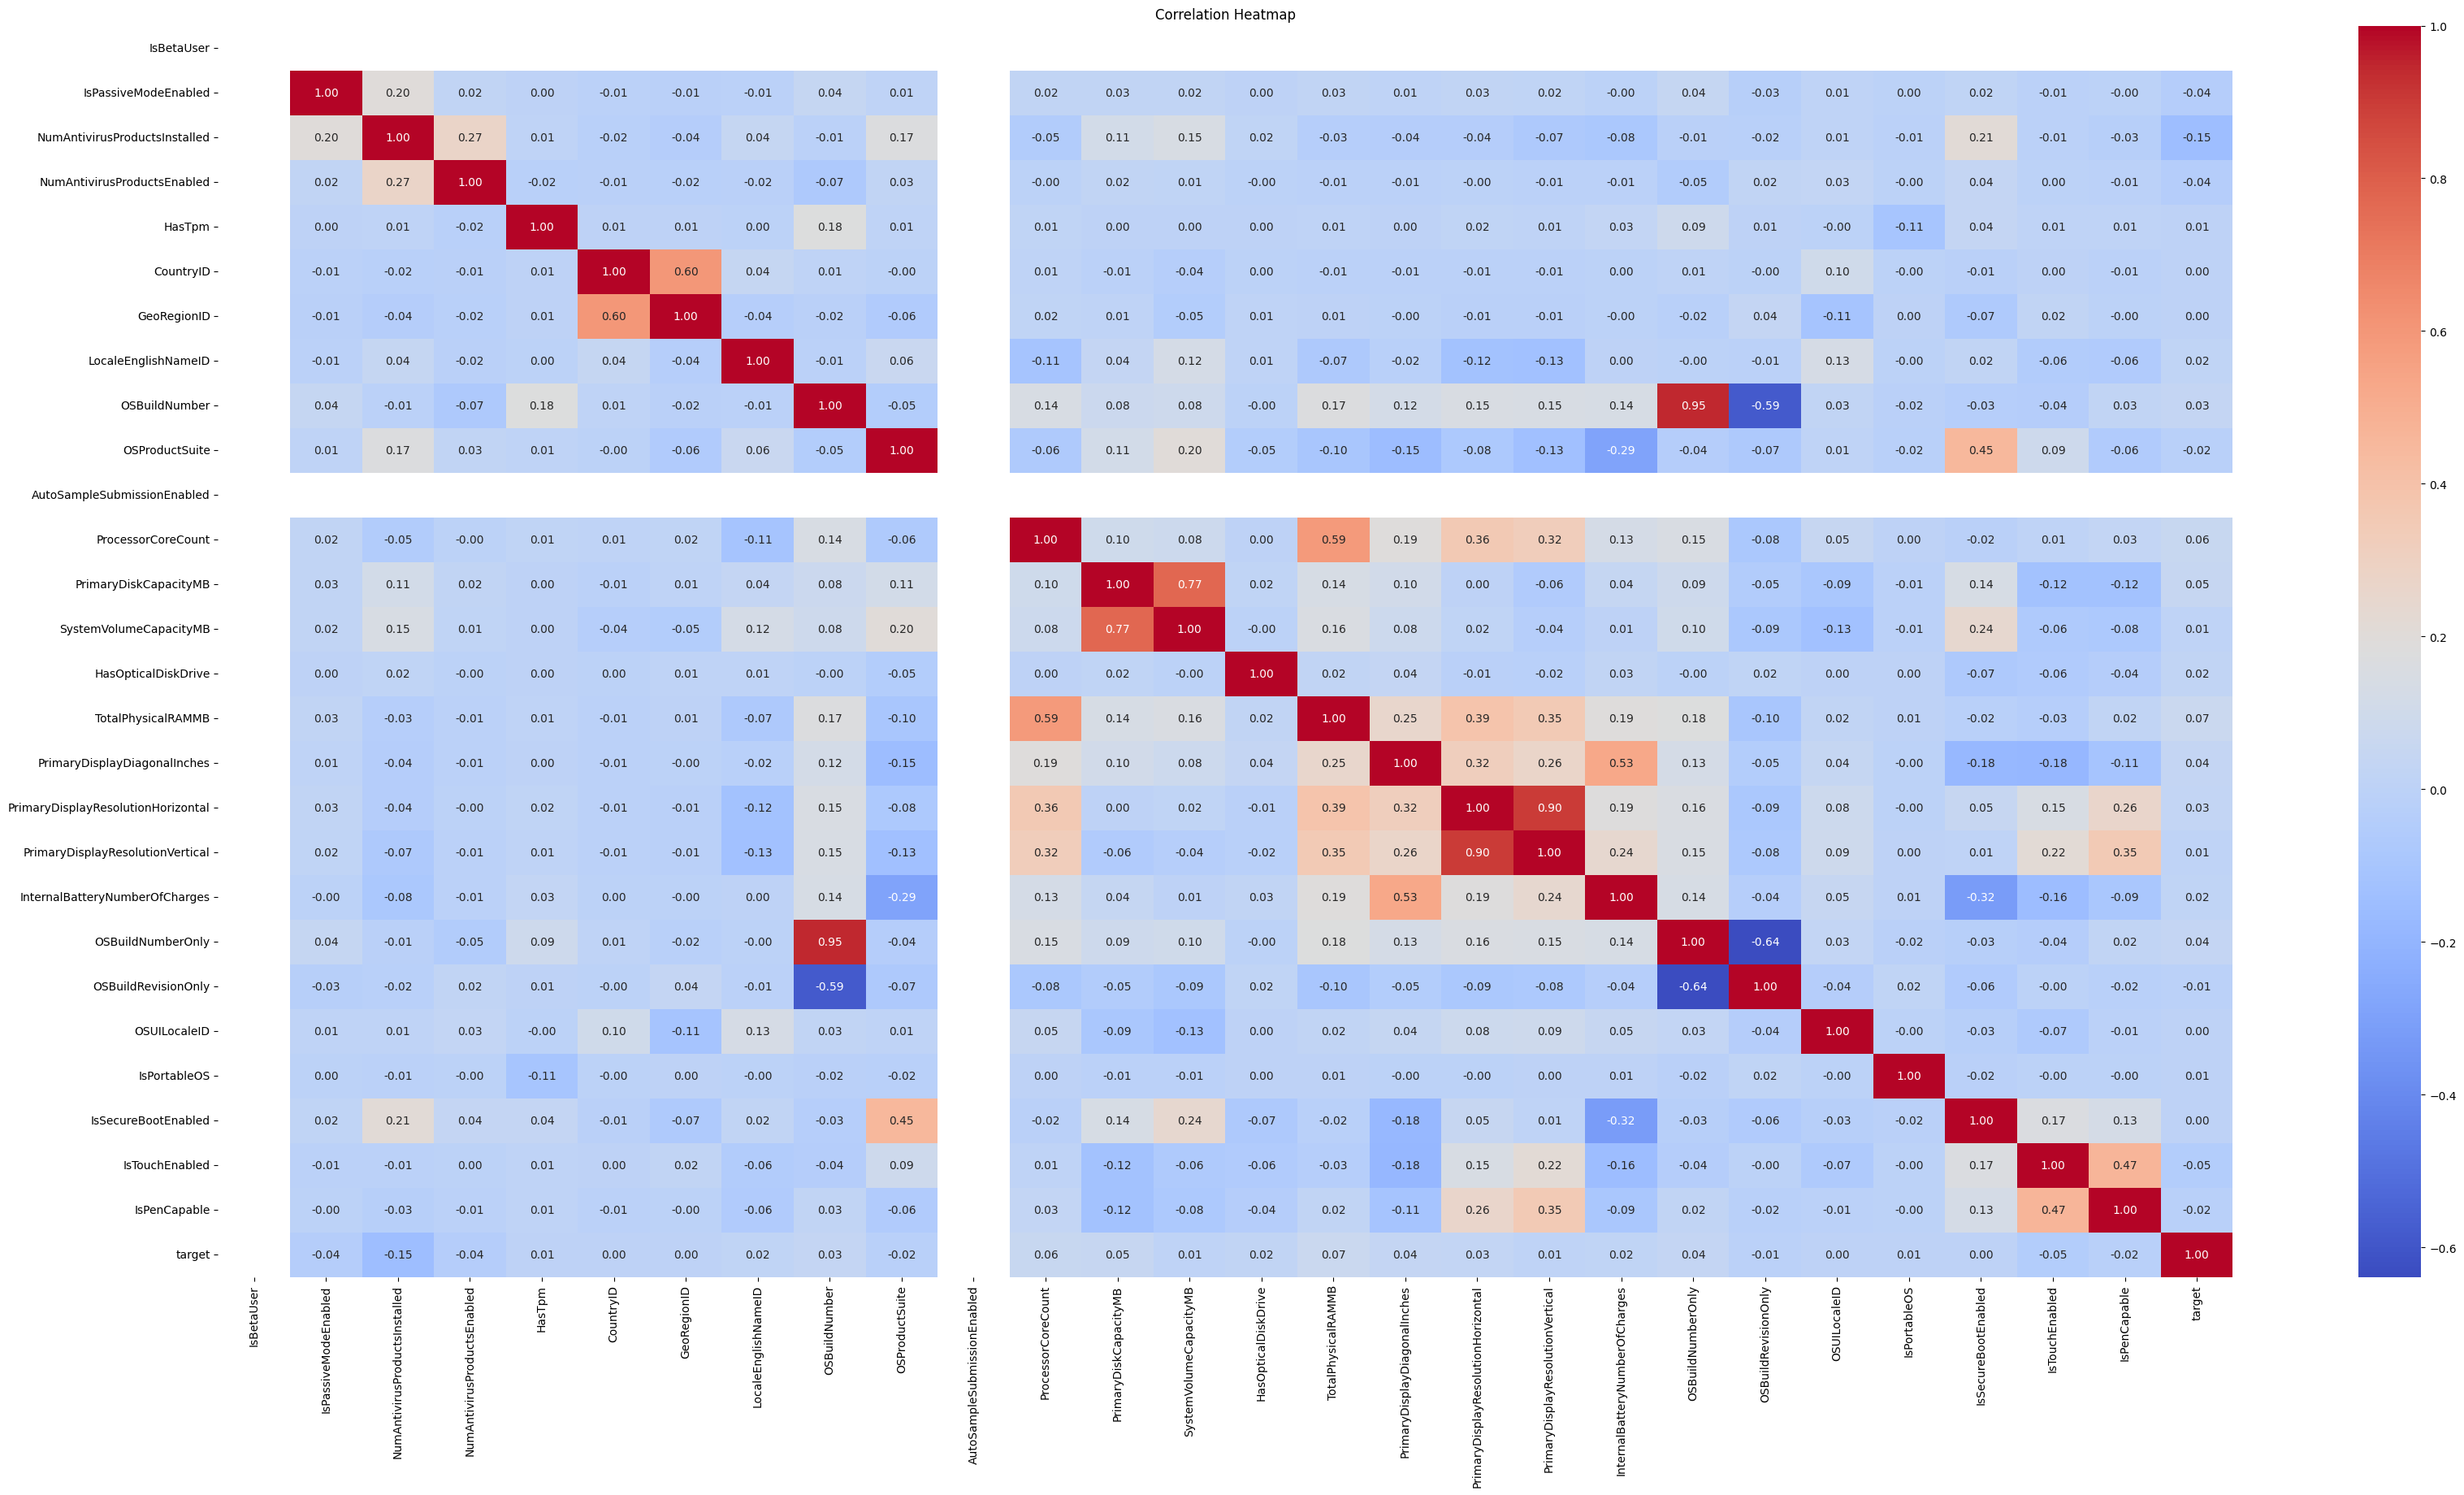

In [26]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(40, 20))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Filtered the highly correlated (r>0.5)pair features.

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


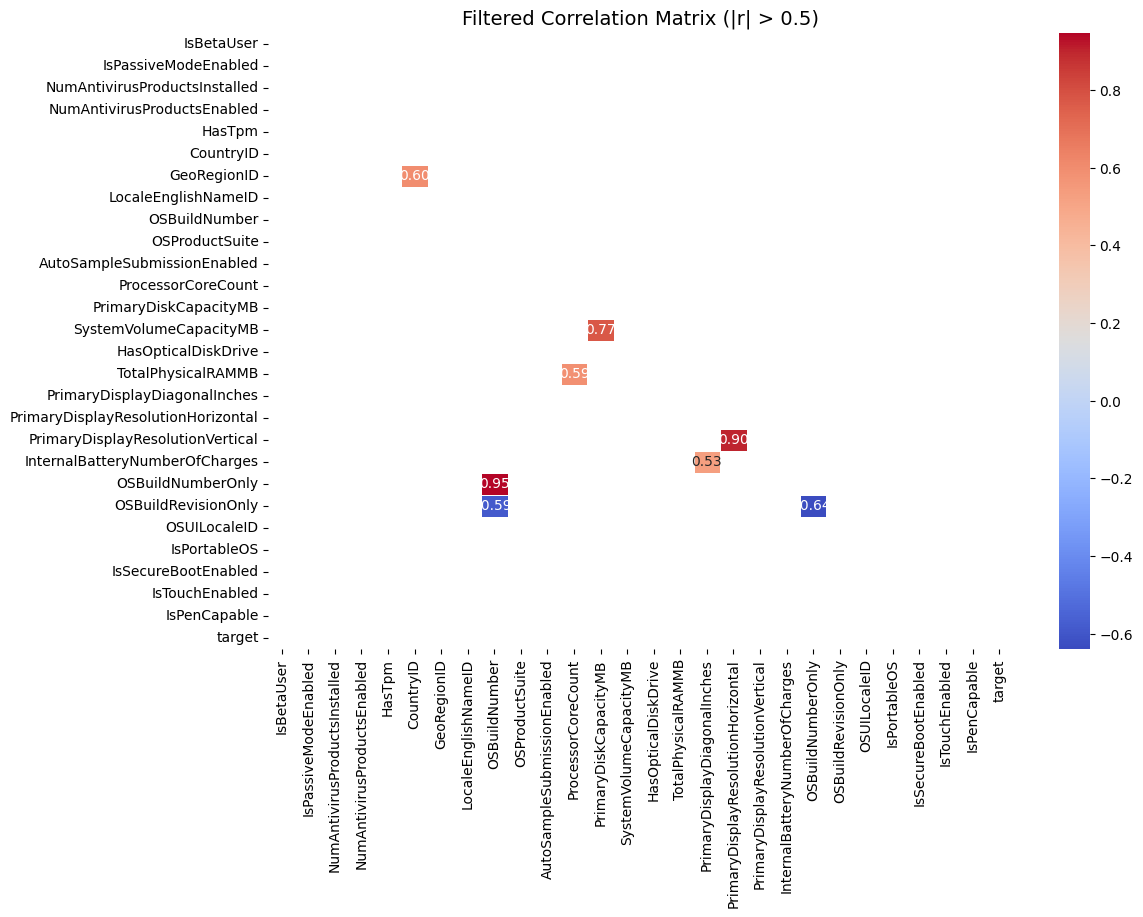

In [27]:
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
filtered_corr = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=np.triu(filtered_corr))
plt.title("Filtered Correlation Matrix (|r| > 0.5)", fontsize=14)
plt.show()


Select 5 top features which is highly correlated with the target.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

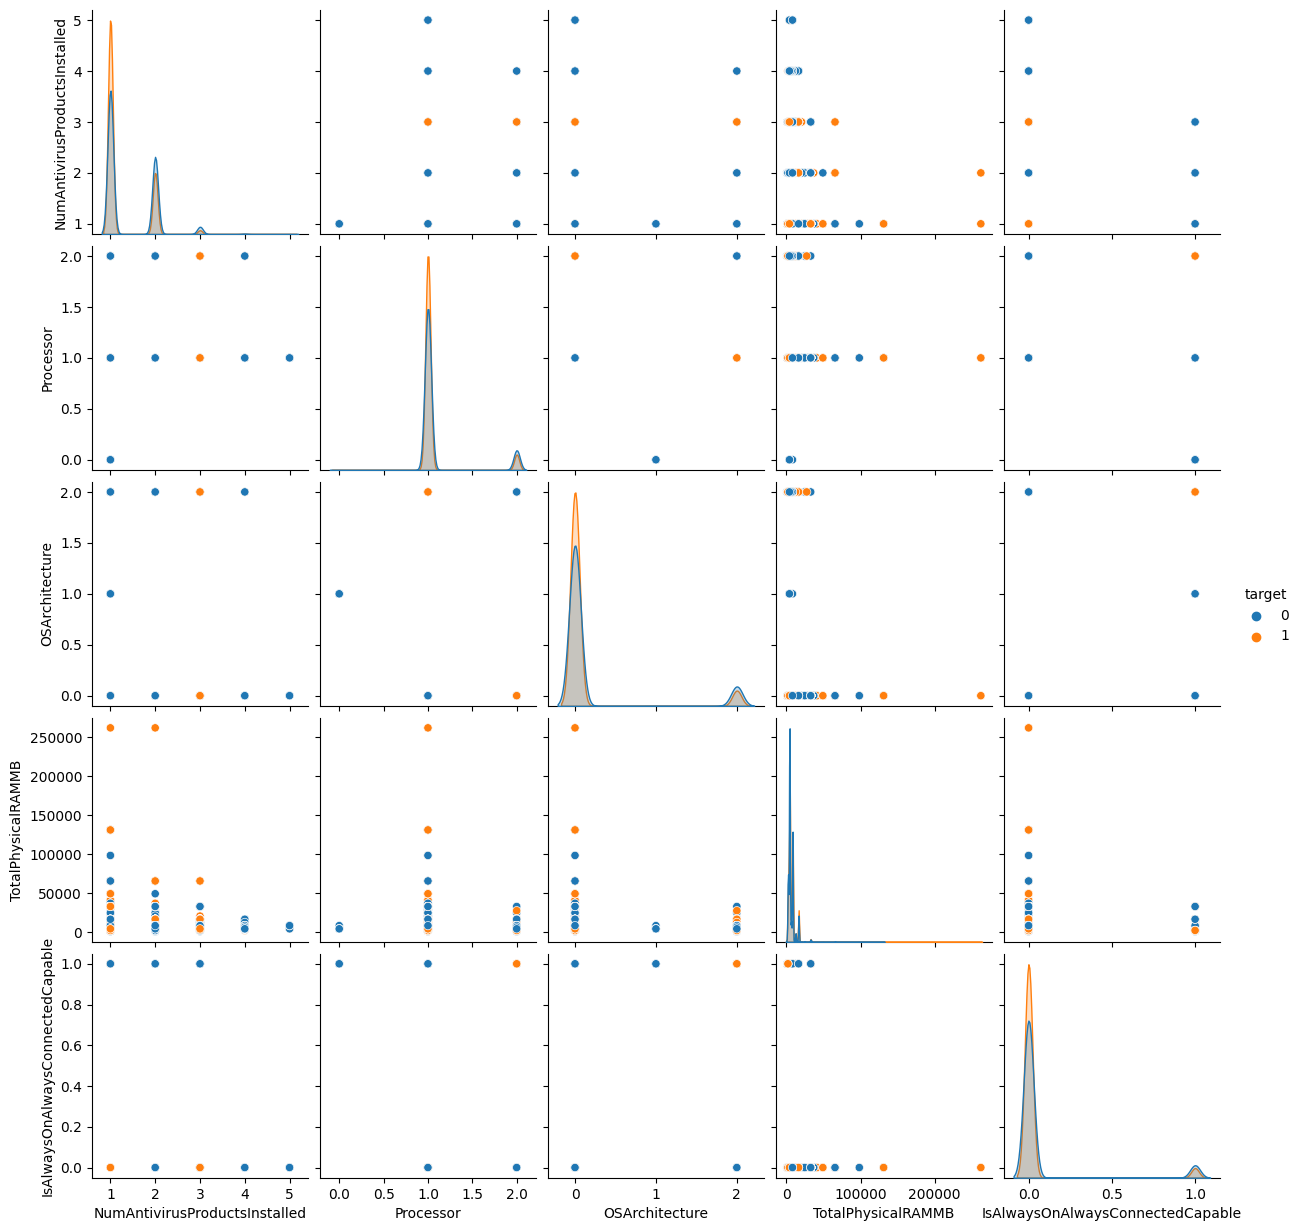

In [28]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))
corr_matrix = df_encoded.corr()
top_features = corr_matrix['target'].abs().sort_values(ascending=False).index[1:6]
pairplot_features = list(top_features) + ['target']
sns.pairplot(df_encoded[pairplot_features], hue='target', diag_kind='kde')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


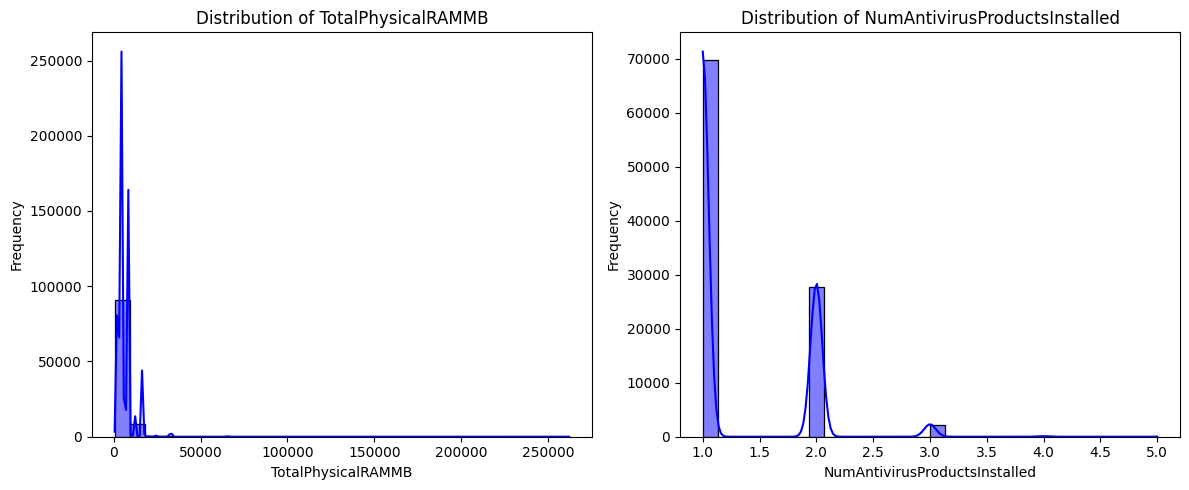

In [29]:
best_features = ["TotalPhysicalRAMMB", "NumAntivirusProductsInstalled"]
plt.figure(figsize=(12, 5))

for i, feature in enumerate(best_features):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color="blue")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**TotalPhysicalRAMMB Distribution**
The distribution is highly right-skewed, which means the low RAM device is very popular among people and the high storage devices less popular.

**NumAntivirusProductsInstalled Distribution**
This plot is right-skewed, which means most device has one antivirus product installed and the small number of devices available have less number of antivirus products installed.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


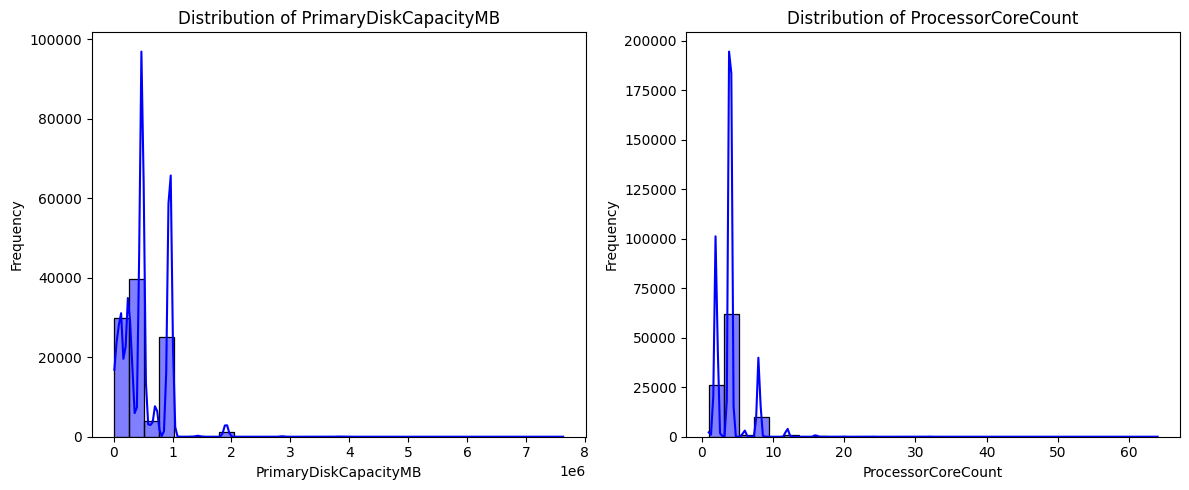

In [30]:
best_features = ["PrimaryDiskCapacityMB", "ProcessorCoreCount"]
plt.figure(figsize=(12, 5))

for i, feature in enumerate(best_features):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color="blue")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

**Primary Disk Capacity (PrimaryDiskCapacityMB)**
The distribution is highly right-skewed, which means the low-storage devices is very popular among people and the high-storage devices less popular.

**Processor Core Count (ProcessorCoreCount)**
Most devices have a low number of cores like 2 to 8 cores. A sharp peak around 2 and 4 cores suggests that dual-core and quad-core CPUs are the most common. Very few devices have high core counts like 16, 32, or more, indicating that high-performance machines are uncommon.

Convert all categorical features into numerical features by using 'OrdinalEncoder'

In [31]:
from sklearn.preprocessing import OrdinalEncoder
z = df_new['target']
df_new = df_new.drop(columns='target')
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

# Perform Ordinal encoder in train and test data
df_new[df_new.columns] = encoder.fit_transform(df_new)
fd_new[fd_new.columns] = encoder.transform(fd_new)

In [32]:
df_new.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,95607.0,1.0,34.0,31.0,2218.0,0.0,4.0,0.0,1497.0,0.0,...,4078.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,2528.0,80.0
1,85800.0,1.0,33.0,31.0,1906.0,0.0,4.0,0.0,1497.0,0.0,...,7332.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,2103.0,98.0
2,98689.0,1.0,34.0,31.0,2331.0,0.0,4.0,0.0,1497.0,0.0,...,1554.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2613.0,106.0
3,21877.0,1.0,34.0,17.0,2253.0,0.0,4.0,0.0,1194.0,1.0,...,5313.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,2551.0,70.0
4,19567.0,1.0,34.0,22.0,2265.0,0.0,4.0,0.0,947.0,1.0,...,2392.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,2563.0,106.0


In [33]:
fd_new.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,-1.0,1.0,33.0,31.0,1856.0,0.0,4.0,0.0,1497.0,0.0,...,8087.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,2063.0,93.0
1,-1.0,1.0,33.0,11.0,2061.0,0.0,4.0,0.0,1187.0,1.0,...,10699.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,1870.0,37.0
2,-1.0,1.0,34.0,31.0,2444.0,0.0,4.0,0.0,1428.0,1.0,...,5325.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,2277.0,84.0
3,-1.0,1.0,36.0,31.0,2731.0,0.0,4.0,0.0,979.0,1.0,...,4449.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,2691.0,84.0
4,14487.0,1.0,28.0,26.0,1144.0,0.0,4.0,0.0,957.0,2.0,...,2129.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,997.0,89.0


Now Split the dataset into training and validation set

In [34]:
# Splitting the training dataset and stored the features in X and target in y
X = df.drop(columns=['target'])
y = df['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Split the encoded training data

In [35]:
X_train_new_df, X_test_new_df, y_train_new_df, y_test_new_df = train_test_split(df_new, z, random_state=42, test_size=0.2, stratify=z)

In [36]:
# Select the numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

Use 'MinMaxScaler' for numerical features and 'OneHotEncoder' for categorical feature to preprocess the data

In [37]:
# Preprocess the data for numerical and categorical column
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [38]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ]
) 

Make the Pipeline with using 'preprocessor' from 'ColumnTransformer' and 'LogisticRegression' and train the model

**This is first model which is trained by LogisticRegression**

In [39]:
# Building the pipeline
logistic_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
# Train the model
logistic_model_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['IsBetaUser', 'IsPassiveModeEnabled', 'NumAntivirusProductsInstalled',
       'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'GeoRegionID',
       'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite',
       'AutoSampleSubmissionEnabled', 'Processor...
       'OSSkuFriendlyName', 'OSInstallType', 'OSInstallLanguageID',
       'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
       'IsFlightsDisabled', 'FlightRing', 'FirmwareManufacturerID',
       'FirmwareVersionID', 'IsVirtualDevice',
       'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'RegionIdentifier',
       'DateAS', 'DateOS'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

Get prediction using 'X_val' and check the accuracy of model by comparing the model prediction 'y_pred' and y_val.

In [40]:
y_pred = logistic_model_pipeline.predict(X_val)
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"LogisticRegression Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred))

LogisticRegression Model Accuracy: 0.6004
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.58      0.59      9895
           1       0.60      0.62      0.61     10105

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.60      0.60     20000



In [41]:
#fd = fd[df.columns.difference(['target'])]
#predictions = logistic_model_pipeline.predict(fd)
#submission = pd.DataFrame({'id': fd.index, 'target': predictions})
#submission.to_csv('submission.csv', index=False)
print("Predictions saved to submission.csv")

Predictions saved to submission.csv


Again preprocess the data for different models and drop some features that have 1 unique value and which do not participate in the prediction by examining the unique value of each feature.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

def get_preprocessor(X_train, X_test):
    columns_to_drop = ['InternalBatteryNumberOfCharges', 'IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled', 'MachineID']
    X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
    X_test = X_test.drop(columns=columns_to_drop, errors='ignore')
    categorical_features = [
    "ProductName", "EngineVersion", "AppVersion", "SignatureVersion", "PlatformType", 
    "Processor", "OSVersion", "OsPlatformSubRelease", "OSBuildLab", "SKUEditionName", 
    "MDC2FormFactor", "DeviceFamily", "PrimaryDiskType", "ChassisType", "PowerPlatformRole", 
    "NumericOSVersion", "OSArchitecture", "OSBranch", "OSEdition", "OSSkuFriendlyName", 
    "OSInstallType", "AutoUpdateOptionsName", "OSGenuineState", "LicenseActivationChannel", 
    "FlightRing", "DateAS", "DateOS"
]

    numerical_features = [
    "RealTimeProtectionState", "IsPassiveModeEnabled", "AntivirusConfigID", 
    "NumAntivirusProductsInstalled", "NumAntivirusProductsEnabled", "HasTpm", "CountryID", 
    "CityID", "GeoRegionID", "LocaleEnglishNameID", "OSBuildNumber", "OSProductSuite", 
    "IsSystemProtected", "SMode", "IEVersionID", "FirewallEnabled", 
    "EnableLUA", "OEMNameID", "OEMModelID", "ProcessorCoreCount", "ProcessorManufacturerID", 
    "ProcessorModelID", "PrimaryDiskCapacityMB", "SystemVolumeCapacityMB", "HasOpticalDiskDrive", 
    "TotalPhysicalRAMMB", "PrimaryDisplayDiagonalInches", "PrimaryDisplayResolutionHorizontal", 
    "PrimaryDisplayResolutionVertical", "InternalBatteryNumberOfCharges", "OSBuildNumberOnly", 
    "OSBuildRevisionOnly", "OSInstallLanguageID", "OSUILocaleID", "IsPortableOS", "FirmwareManufacturerID", "FirmwareVersionID", "IsSecureBootEnabled", 
    "IsVirtualDevice", "IsTouchEnabled", "IsPenCapable", "IsAlwaysOnAlwaysConnectedCapable", 
    "IsGamer", "RegionIdentifier"
]
    # create a preprocessing pipeline
    preprocessor = ColumnTransformer(transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('reduce_dim', TruncatedSVD(n_components=min(43, len(numerical_features))))
        ]), numerical_features)
    ], remainder='passthrough')  
    return preprocessor, categorical_features, numerical_features, X_train, X_test
print("done")

done


**This is my second model trained by using 'naive_bayes' algorithm**

In [43]:
from sklearn.naive_bayes import GaussianNB

categorical_feature = [
    "ProductName", "EngineVersion", "AppVersion", "SignatureVersion", "PlatformType", 
    "Processor", "OSVersion", "OsPlatformSubRelease", "OSBuildLab", "SKUEditionName", 
    "MDC2FormFactor", "DeviceFamily", "PrimaryDiskType", "ChassisType", "PowerPlatformRole", 
    "NumericOSVersion", "OSArchitecture", "OSBranch", "OSEdition", "OSSkuFriendlyName", 
    "OSInstallType", "AutoUpdateOptionsName", "OSGenuineState", "LicenseActivationChannel", 
    "FlightRing", "DateAS", "DateOS"
    ]
numerical_feature = [
    "RealTimeProtectionState", "IsPassiveModeEnabled", "AntivirusConfigID", 
    "NumAntivirusProductsInstalled", "NumAntivirusProductsEnabled", "HasTpm", "CountryID", 
    "CityID", "GeoRegionID", "LocaleEnglishNameID", "OSBuildNumber", "OSProductSuite", 
    "IsSystemProtected", "SMode", "IEVersionID", "FirewallEnabled", 
    "EnableLUA", "OEMNameID", "OEMModelID", "ProcessorCoreCount", "ProcessorManufacturerID", 
    "ProcessorModelID", "PrimaryDiskCapacityMB", "SystemVolumeCapacityMB", "HasOpticalDiskDrive", 
    "TotalPhysicalRAMMB", "PrimaryDisplayDiagonalInches", "PrimaryDisplayResolutionHorizontal", 
    "PrimaryDisplayResolutionVertical", "InternalBatteryNumberOfCharges", "OSBuildNumberOnly", 
    "OSBuildRevisionOnly", "OSInstallLanguageID", "OSUILocaleID", "IsPortableOS", "FirmwareManufacturerID", "FirmwareVersionID", "IsSecureBootEnabled", 
    "IsVirtualDevice", "IsTouchEnabled", "IsPenCapable", "IsAlwaysOnAlwaysConnectedCapable", 
    "IsGamer", "RegionIdentifier"
    ]
# create a preprocessing pipeline
abcd = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('svd', TruncatedSVD(n_components = 40))
])
preprocessor =  ColumnTransformer( transformers = [
    ('cat', OneHotEncoder(sparse_output = False, max_categories=50, handle_unknown='ignore'), categorical_feature),
    ('num',abcd, numerical_feature)
    ]) 
# Pipeline with Naïve Bayes
gaussian_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', GaussianNB())
])

# Train Model
gaussian_model_pipeline.fit(X_train, y_train)

# Predict
y_pred = gaussian_model_pipeline.predict(X_val)

# Evaluate Performance
accuracy = accuracy_score(y_val, y_pred)
print("Naïve Bayes Model Accuracy:", accuracy)
print("Classification Report:", classification_report(y_val, y_pred))

Naïve Bayes Model Accuracy: 0.52305
Classification Report:               precision    recall  f1-score   support

           0       0.61      0.10      0.17      9895
           1       0.52      0.94      0.66     10105

    accuracy                           0.52     20000
   macro avg       0.56      0.52      0.42     20000
weighted avg       0.56      0.52      0.42     20000



**This is the third model which is trained by 'xgboost'**

In [44]:
import xgboost as xgb
# Handle class imbalance
class_0, class_1 = np.bincount(y_train)
scale_pos_weight = class_0 / class_1

# XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Pipeline with XGBoost
xgboost_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])
# Train Model
xgboost_model_pipeline.fit(X_train, y_train)
# Predict
y_pred = xgboost_model_pipeline.predict(X_val)
# Evaluate Performance
accuracy = accuracy_score(y_val, y_pred)
print("XGBoost Model Accuracy:", accuracy)
print("Classification Report:", classification_report(y_val, y_pred))

XGBoost Model Accuracy: 0.61805
Classification Report:               precision    recall  f1-score   support

           0       0.62      0.57      0.60      9895
           1       0.61      0.66      0.64     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



In [45]:
#result = xgboost_model_pipeline.predict(fd)
#fd = fd[df.columns.difference(['target'])]
#submission = pd.DataFrame({'id': fd.index, 'target': result})
#submission.to_csv('submission.csv', index=False)
print("done")

done


Make table and compare first 3 model and their performance

In [46]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
models = {
    "Logistic Regression": logistic_model_pipeline,
    "Naive Bayes": gaussian_model_pipeline,
    "XGBoost": xgboost_model_pipeline
}
results = []
for name, model in models.items():
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "ROC AUC Score": auc
    })
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  F1 Score  ROC AUC Score
0  Logistic Regression   0.60040  0.611435       0.636308
1          Naive Bayes   0.52305  0.664745       0.527919
2              XGBoost   0.61805  0.636325       0.661707


Use the feature selection method "SelectFromModel", use "RandomForestClassifier", "LinearSVC" as the classifier and SMOTE for handle class imbalance.

In [47]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
# handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_new_df, y_train_new_df)

# Pipeline for feature selection with Classifier
clf = Pipeline([
    ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False, class_weight='balanced'))),
    ('classification', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Fit the model
clf.fit(X_train_balanced, y_train_balanced)
y_preds = clf.predict(X_test_new_df)
accuracy = accuracy_score(y_test_new_df, y_preds)
print(f'accuracy:{accuracy}')
print("Classification Report:", classification_report(y_test_new_df, y_preds))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


accuracy:0.61945
Classification Report:               precision    recall  f1-score   support

           0       0.62      0.61      0.61      9895
           1       0.62      0.63      0.62     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



Use the PCA, reduce the feature to 55 components, and train the model using the 'XGBClassifier'.

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=55)
X_train_pca = pca.fit_transform(X_train_new_df)
X_test_pca = pca.transform(X_test_new_df)
X_test_pca_val = pca.transform(fd_new)
from xgboost import XGBClassifier
# Set the Parameter
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False, 
    n_estimators=100,             
    learning_rate=0.1,            
    max_depth=6,               
    colsample_bytree=0.8,        
    subsample=0.8            
)
# Train the model
xgb_model.fit(X_train_pca, y_train_new_df)
y_p = xgb_model.predict(X_test_pca)
accuracy = accuracy_score(y_test_new_df, y_p)
print(f'accuracy:{accuracy}')
print("Classification Report:", classification_report(y_test_new_df, y_p))

accuracy:0.6218
Classification Report:               precision    recall  f1-score   support

           0       0.63      0.58      0.60      9895
           1       0.62      0.67      0.64     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



Now use the recursive feature elimination feature selection library 'RFE' with 'XGBClassifier' and select the top 55 features.
I checked many times by selecting the different number of features and got maximum accuracy at the top 55 features.

In [49]:
from sklearn.feature_selection import RFE
base_model = XGBClassifier(random_state=42)
# Set the RFE
rfe = RFE(estimator=base_model, n_features_to_select=55)
X_train_rfe = rfe.fit_transform(X_train_new_df, y_train_new_df)
X_test_rfe = rfe.transform(X_test_new_df)
X_test_pred = rfe.transform(fd_new)

clf_rfe = XGBClassifier(random_state=42)
clf_rfe.fit(X_train_rfe, y_train_new_df)
y_pred_rfe = clf_rfe.predict(X_test_rfe)
accuracy = accuracy_score(y_test_new_df, y_pred_rfe)
print(f'accuracy:{accuracy}')
print("Classification Report\n:", classification_report(y_test_new_df, y_pred_rfe))

accuracy:0.62575
Classification Report
:               precision    recall  f1-score   support

           0       0.63      0.59      0.61      9895
           1       0.62      0.66      0.64     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



In [50]:
#result = clf_rfe.predict(X_test_pred)
#fd = fd[df.columns.difference(['target'])]
#submission = pd.DataFrame({'id': fd.index, 'target': result})
#submission.to_csv('submission.csv', index=False)
#count_ones = (submission['target'] == 1).sum()
#count_zeros = (submission['target'] == 0).sum()

# Print results
#print(f"Total 1s: {count_ones}")
#print(f"Total 0s: {count_zeros}")

Use 'SelectKBest' for feature selection and set the k = 50 (I tested many times and got the best accuracy at k = 50) and train the model with XGBoost.

In [51]:
from sklearn.feature_selection import SelectKBest, f_classif
# Impliment SelectKBest for feature selection and best 50 features
selector = SelectKBest(score_func=f_classif, k=50)
X_train_selected = selector.fit_transform(X_train_new_df, y_train_new_df)
X_test_selected = selector.transform(X_test_new_df)
X_prediction = selector.transform(fd_new)
# Set the Parameter of XGBClassifier
xgb_model_k = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=300,
    learning_rate=0.03, 
    max_depth=7,
    colsample_bytree=0.8,
    subsample=0.8,
    scale_pos_weight=1 
)
# Train the model
xgb_model_k.fit(X_train_selected, y_train_new_df)
y_pred = xgb_model_k.predict(X_test_selected)
accuracy = accuracy_score(y_test_new_df, y_pred)
print(f"XGBoost Model Accuracy after SelectKBest: {accuracy:.4f}")
print("Classification Report:", classification_report(y_test_new_df, y_p))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 5 25 62] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


XGBoost Model Accuracy after SelectKBest: 0.6311
Classification Report:               precision    recall  f1-score   support

           0       0.63      0.58      0.60      9895
           1       0.62      0.67      0.64     10105

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000



In [52]:
#result = xgb_model_k.predict(X_prediction)
#fd = fd[df.columns.difference(['target'])]
#submission = pd.DataFrame({'id': fd.index, 'target': result})
#submission.to_csv('submission.csv', index=False)
#count_ones = (submission['target'] == 1).sum()
#count_zeros = (submission['target'] == 0).sum()
#Print results
#print(f"Total 1s: {count_ones}")
#print(f"Total 0s: {count_zeros}")

Now add 'RandomizedSearchCV' hyperparameter tuning with SelectKBest feature selection method and XGBoost model training.

In [53]:
from sklearn.model_selection import RandomizedSearchCV
selector = SelectKBest(score_func=f_classif, k=50)
X_train_selected = selector.fit_transform(X_train_new_df, y_train_new_df)
X_test_selected = selector.transform(X_test_new_df)
X_prediction = selector.transform(fd_new)
# Define the XGBoost model and set the Parameter
xgb = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    use_label_encoder=False
)
# set the Hyperparameter tuning parameter
parameter = {
    'n_estimators': np.arange(400, 600, 800),  
    'learning_rate': [0.01, 0.03, 0.05],  
    'max_depth': [7, 9, 11],  
    'colsample_bytree': [0.7, 0.8, 0.9],  
    'subsample': [0.7, 0.8, 0.9],  
    'gamma': [0, 0.1, 0.2],  
    'reg_lambda': [1, 2, 5],  
    'reg_alpha': [0, 0.5, 1]
}
# Set parameter for efficient tuning
random_search = RandomizedSearchCV(
    xgb, param_distributions=parameter, 
    n_iter=20, cv=3, scoring='accuracy', 
    n_jobs=-1, verbose=2, random_state=42
)
# Train the model
random_search.fit(X_train_selected, y_train_new_df)
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test_selected)
accuracy = accuracy_score(y_test_new_df, y_pred)
print("XGBoost Accuracy (SelectKBest + RandomizedSearchCV):",  accuracy)
print("Classification Report:\n", classification_report(y_test_new_df, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 5 25 62] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


XGBoost Accuracy (SelectKBest + RandomizedSearchCV): 0.62905
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.60      0.61      9895
           1       0.63      0.66      0.64     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



In [54]:
#fd = fd[df.columns.difference(['target'])]
#predictions = best_xgb.predict(X_prediction)
#submission = pd.DataFrame({'id': fd.index, 'target': predictions})
#submission.to_csv('submission.csv', index=False)
#print("Predictions saved to submission.csv")
#count_ones = (submission['target'] == 1).sum()
#count_zeros = (submission['target'] == 0).sum()
# Print results
#print(f"Total 1s: {count_ones}")
#print(f"Total 0s: {count_zeros}")

Model trainig by XGBoost without any feature selection method with handling class imbalance.

In [55]:
# Handle Class Imbalance
class_counts = np.bincount(y_train_new_df)
scale_pos_weight = class_counts[0] / class_counts[1]
# Set the Parameter
xgb_model_c = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=300,
    learning_rate=0.03,
    max_depth=7,
    colsample_bytree=0.8,
    subsample=0.8,
    scale_pos_weight=scale_pos_weight  
)
# Train the model
xgb_model_c.fit(X_train_new_df, y_train_new_df)
y_pred = xgb_model_c.predict(X_test_new_df)
accuracy = accuracy_score(y_test_new_df, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test_new_df, y_pred))


XGBoost Model Accuracy: 0.6300
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.59      0.61      9895
           1       0.63      0.67      0.65     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



In [56]:
#fd = fd[df.columns.difference(['target'])]
#predictions = xgb_model_c.predict(fd_new)
#submission = pd.DataFrame({'id': fd.index, 'target': predictions})
#submission.to_csv('submission.csv', index=False)
#print("Predictions saved to submission.csv")
#count_ones = (submission['target'] == 1).sum()
#count_zeros = (submission['target'] == 0).sum()
# Print results
#print(f"Total 1s: {count_ones}")
#print(f"Total 0s: {count_zeros}")

Model training by using XGBoost and SMOTE (handling class imbalance) without any feature selection method.

In [57]:
# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res= smote.fit_resample(X_train_new_df, y_train_new_df)
# Set the parameter
xgb_model_d = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=900,
    learning_rate=0.03,
    max_depth=7,
    colsample_bytree=0.8,
    subsample=0.8
)
# Train the model
xgb_model_d.fit(X_train_res, y_train_res)
y_pred = xgb_model_d.predict(X_test_new_df)
accuracy = accuracy_score(y_test_new_df, y_pred)
print(f"XGBoost Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test_new_df, y_pred))

XGBoost Model Accuracy: 0.6297
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.60      0.62      9895
           1       0.63      0.66      0.64     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



In [58]:
#fd = fd[df.columns.difference(['target'])]
#predictions = xgb_model_d.predict(fd_new)
#submission = pd.DataFrame({'id': fd.index, 'target': predictions})
#submission.to_csv('submission.csv', index=False)
#print("Predictions saved to submission.csv")
#count_ones = (submission['target'] == 1).sum()
#count_zeros = (submission['target'] == 0).sum()
# Print results
#print(f"Total 1s: {count_ones}")
#print(f"Total 0s: {count_zeros}")

Predictions saved to submission.csv
Total 1s: 4615
Total 0s: 5385


Now add the 'RandomizedSearchCV' hyperparameter tuning in the XGBoost model with SMOTE without any feature selection.

In [59]:
# Handle class imbalance by SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_new_df, y_train_new_df)
# Set the XGBClassifier parameter
xgb_model_cl = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
# Set the Parameter for Hyperparameter tuning
p_grid = {
    'n_estimators': [100, 300, 500],  
    'learning_rate': [0.01, 0.03, 0.05, 0.1], 
    'max_depth': [3, 5, 7, 10],
    'colsample_bytree': [0.7, 0.8, 1.0], 
    'subsample': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2], 
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}
# Make Instance and set the parameter for efficient tuning
randomized_search = RandomizedSearchCV(
    xgb_model_cl, param_distributions=p_grid,
    n_iter=20, cv=3, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42
)
# Fit the model
randomized_search.fit(X_train_resampled, y_train_resampled)
best_xgb = randomized_search.best_estimator_
y_pred = best_xgb.predict(X_test_new_df)
accuracy = accuracy_score(y_test_new_df, y_pred)
print("XGBoost Model Accuracy after Hyperparameter Tuning:", accuracy)
print("Classification Report:\n", classification_report(y_test_new_df, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
XGBoost Model Accuracy after Hyperparameter Tuning: 0.62835
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.60      0.61      9895
           1       0.63      0.66      0.64     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



In [60]:
#fd = fd[df.columns.difference(['target'])]
#predictions = best_xgb.predict(fd_new)
#submission = pd.DataFrame({'id': fd.index, 'target': predictions})
#submission.to_csv('submission.csv', index=False)
#print("Predictions saved to submission.csv")
#count_ones = (submission['target'] == 1).sum()
#count_zeros = (submission['target'] == 0).sum()
# Print results
#print(f"Total 1s: {count_ones}")
#print(f"Total 0s: {count_zeros}")

Finally, I am using XGBClassifier + RandomizedSearchCV + SMOTE + SelectKBest and train the model then check the accuracy.

In [61]:
from collections import Counter 
selector = SelectKBest(score_func=f_classif, k=50)
X_train_selected = selector.fit_transform(X_train_new_df, y_train_new_df)
X_test_selected = selector.transform(X_test_new_df)
X_prediction = selector.transform(fd_new)
# Computed scale_pos_weight
class_counts = Counter(y_train_new_df)
n_pos = class_counts[1] 
n_neg = class_counts[0] 
scale_pos = 0
if n_pos > 0:
    scale_pos = n_neg / n_pos
else:
    scale_pos = 1
# Handle Class Imbalance 
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train_new_df)
# Set the Classifier parameter

xgb = XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    use_label_encoder=False,
    scale_pos_weight=scale_pos 
)
# Set the Hyperparameter tuning parameter
parameters_grid = {
    'n_estimators': np.arange(400, 600, 800),  
    'learning_rate': [0.01, 0.03, 0.05],  
    'max_depth': [7, 9, 11],  
    'colsample_bytree': [0.7, 0.8, 0.9],  
    'subsample': [0.7, 0.8, 0.9],  
    'gamma': [0, 0.1, 0.2],  
    'reg_lambda': [1, 2, 5],  
    'reg_alpha': [0, 0.5, 1]
}
# Make instance and set the parameter of 'RandomizedSearchCV'
random_search = RandomizedSearchCV(
    xgb, param_distributions=parameters_grid, 
    n_iter=20, cv=3, scoring='accuracy', 
    n_jobs=-1, verbose=2, random_state=42
)
# Fit the model
random_search.fit(X_train_balanced, y_train_balanced)
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test_selected)
accuracy = accuracy_score(y_test_new_df, y_pred)
print("XGBoost Accuracy after SelectKBest & RandomizedSearchCV:", accuracy)
print("Classification Report:\n", classification_report(y_test_new_df, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 5 25 62] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGBoost Accuracy after SelectKBest & RandomizedSearchCV: 0.63
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62      9895
           1       0.63      0.65      0.64     10105

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



In [62]:
fd = fd[df.columns.difference(['target'])]
predictions = best_xgb.predict(X_prediction)
submission = pd.DataFrame({'id': fd.index, 'target': predictions})
submission.to_csv('submission.csv', index=False)
print("Predictions saved to submission.csv")
count_ones = (submission['target'] == 1).sum()
count_zeros = (submission['target'] == 0).sum()
# Print results
print(f"Total 1s: {count_ones}")
print(f"Total 0s: {count_zeros}")

Predictions saved to submission.csv
Total 1s: 4922
Total 0s: 5078
